In [1]:
import pandas as pd
import numpy as np

# TEMPLATE

# Day 10

In [5]:
day = 'day10'
with open(f'test{day}' , 'r') as f:
    file = f.read().splitlines()
file = pd.Series(file)
file

/Users/alixtiran-cappello/.pyenv/versions/3.7.12/envs/rotor/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


Series([], dtype: float64)

In [155]:
with open(day , 'r') as f:
    file = f.read().splitlines()
file = pd.Series(file)
file

0      (({({({(({{<{{()<>}}>}}([<[(<>{})(()()))[[{}[]...
1      [{(<(<<([[[{(([]{})<(){}>)<{<>}(()[])>}]]{[([(...
2      ((<[([(({<<<{{<><>}({}<>)}{{<>{}}[[]()]}>>([<[...
3      [<[<({{({{[({[[][]]<{}<>>})<[<{}{}>]([<><>](<>...
4      [<{<<({[{{{(<({}()){{}[]}><(<><>)[[]{}]>)}<(([...
                             ...                        
97     <({{<(<([({<[{<>[]}]<[{}{}]{()[]}>>(({[]()}))}...
98     {[(([<([[<[<{[()]}>[<[<>{}][<><>]>{[()]{<>}}]]...
99     <<({<<<({(<<[<[]()>{[][]}][<{}{}>{[]<>}]>[{{<>...
100    [[[(<<(({[(((((){})(<>{}))<[[]()]{{}{})>)(<[()...
101    {[[{<[{([<[<{(<><>)}({{}}([][]))>]{{<[<>{}]>(<...
Length: 102, dtype: object

In [ ]:
def map_pattern(x):
    #x = x.split(": ")[1]
    x = x.split(',')
    return np.array(x, dtype=int)
          
data = file.apply(map_pattern).to_list()
#data = pd.DataFrame(data)
#data = data.astype(int)
data 

## Test

In [156]:
data = pd.DataFrame(file, columns=['string'])
data

,string
0,(({({({(({{<{{()<>}}>}}([<[(<>{})(()()))[[{}[]...
1,[{(<(<<([[[{(([]{})<(){}>)<{<>}(()[])>}]]{[([(...
2,((<[([(({<<<{{<><>}({}<>)}{{<>{}}[[]()]}>>([<[...
3,[<[<({{({{[({[[][]]<{}<>>})<[<{}{}>]([<><>](<>...
4,[<{<<({[{{{(<({}()){{}[]}><(<><>)[[]{}]>)}<(([...
...,...
97,<({{<(<([({<[{<>[]}]<[{}{}]{()[]}>>(({[]()}))}...
98,{[(([<([[<[<{[()]}>[<[<>{}][<><>]>{[()]{<>}}]]...
99,<<({<<<({(<<[<[]()>{[][]}][<{}{}>{[]<>}]>[{{<>...
100,[[[(<<(({[(((((){})(<>{}))<[[]()]{{}{})>)(<[()...


## Prep

In [165]:
# Python3 code to Check for 
# balanced parentheses in an expression
open_list = ["[","{","(", '<']
close_list = ["]","}",")", '>']

matching = { 
    ')': 3,
            
    "]": 57,
'}': 1197,
'>': 25137
}

In [158]:
# Function to check parentheses
def check(myStr):
    stack = []
    for i in myStr:
        if i in open_list:
            stack.append(i)
        elif i in close_list:
            pos = close_list.index(i)
            if ((len(stack) > 0) and
                (open_list[pos] == stack[len(stack)-1])):
                stack.pop()
            else:
                return "Corrupted", i
    if len(stack) == 0:
        return "Balanced", None
    else:
        return "Unbalanced", None
  
  
# Driver code
string = "{[]{()}}"
print(string,"-", check(string))
  
string = "[{}{})(]"
print(string,"-", check(string))
  
string = "((()"
print(string,"-",check(string))

{[]{()}} - ('Balanced', None)
[{}{})(] - ('Corrupted', ')')
((() - ('Unbalanced', None)


## Part 1

In [159]:
data['status']= data.string.apply(check)

In [160]:
data['char'] = data.status.apply(lambda x: x[1])

In [161]:
data['status'] = data.status.apply(lambda x: x[0])

In [162]:
data

,string,status,char
0,(({({({(({{<{{()<>}}>}}([<[(<>{})(()()))[[{}[]...,Corrupted,)
1,[{(<(<<([[[{(([]{})<(){}>)<{<>}(()[])>}]]{[([(...,Unbalanced,None
2,((<[([(({<<<{{<><>}({}<>)}{{<>{}}[[]()]}>>([<[...,Corrupted,}
3,[<[<({{({{[({[[][]]<{}<>>})<[<{}{}>]([<><>](<>...,Corrupted,}
4,[<{<<({[{{{(<({}()){{}[]}><(<><>)[[]{}]>)}<(([...,Unbalanced,None
...,...,...,...
97,<({{<(<([({<[{<>[]}]<[{}{}]{()[]}>>(({[]()}))}...,Unbalanced,None
98,{[(([<([[<[<{[()]}>[<[<>{}][<><>]>{[()]{<>}}]]...,Unbalanced,None
99,<<({<<<({(<<[<[]()>{[][]}][<{}{}>{[]<>}]>[{{<>...,Unbalanced,None
100,[[[(<<(({[(((((){})(<>{}))<[[]()]{{}{})>)(<[()...,Corrupted,)


In [167]:
summary = pd.DataFrame(data.char.value_counts()).reset_index()
summary

,index,char
0,),17
1,>,15
2,},10
3,],9


In [168]:
summary['index'] = summary['index'].map(matching)

In [169]:
(summary['index'] * summary.char).sum()

389589

## Part 2

In [170]:
# Function to check parentheses
def check(myStr):
    stack = []
    unba = []
    for i in myStr:
        if i in open_list:
            stack.append(i)
        elif i in close_list:
            pos = close_list.index(i)
            if ((len(stack) > 0) and
                (open_list[pos] == stack[len(stack)-1])):
                stack.pop()
            else:
                return "Corrupted", i
    if len(stack) == 0:
        return "Balanced", None
    else:
        return stack

In [171]:
unba = data[data.status == 'Unbalanced']
unba = unba[['string']]

In [173]:
unba['list'] = unba.string.apply(check)

In [175]:
matcher = { 
    '(': 1,   
    "[": 2,
'{': 3,
'<': 4
}

In [176]:
def count_point(stack):
    count = 0
    stack.reverse()
    for item in stack:
        count *= 5
        count += matcher[item]
    return count

In [177]:
unba['res'] = unba['list'].apply(count_point)

In [179]:
res = unba['res'].sort_values().reset_index(drop='True')

In [180]:
res[len(res) // 2]

1190420163

# Day 11

In [3]:
day = 'day11'
with open(f'test{day}' , 'r') as f:
    file = f.read().splitlines()
file = pd.Series(file)
file

0    5483143223
1    2745854711
2    5264556173
3    6141336146
4    6357385478
5    4167524645
6    2176841721
7    6882881134
8    4846848554
9    5283751526
dtype: object

In [4]:
with open(day , 'r') as f:
    file = f.read().splitlines()
file = pd.Series(file)
file

0    5212166716
1    1567322581
2    2268461548
3    3481561744
4    6248342248
5    6526667368
6    5627335775
7    8124511754
8    4614137683
9    4724561156
dtype: object

In [5]:
def map_pattern(x):
    #x = x.split(": ")[1]
    x = [it for it in x]
    return np.array(x, dtype=int)
          
data = file.apply(map_pattern).to_list()
data = pd.DataFrame(data)
#data = data.astype(int)
#data  = data.to_numpy()
data

,0,1,2,3,4,5,6,7,8,9
0,5,2,1,2,1,6,6,7,1,6
1,1,5,6,7,3,2,2,5,8,1
2,2,2,6,8,4,6,1,5,4,8
3,3,4,8,1,5,6,1,7,4,4
4,6,2,4,8,3,4,2,2,4,8
5,6,5,2,6,6,6,7,3,6,8
6,5,6,2,7,3,3,5,7,7,5
7,8,1,2,4,5,1,1,7,5,4
8,4,6,1,4,1,3,7,6,8,3
9,4,7,2,4,5,6,1,1,5,6


## Part 1

In [7]:
import itertools

def limit_range(coordo):
    return max(coordo-1, 0), min(coordo+2, 10)

def upgrade_next(x, y):
    positions = []
    a = np.arange(*limit_range(x))
    b = np.arange(*limit_range(y))
    
    positions = itertools.product(a,b)         
    return list(positions)

def run(df, n_runs):
    data = df.copy()
    flashes = 0
    
    for run in range(n_runs):
        data = data + 1
        xs, ys = np.where(data > 9)
        
        while len(xs) > 0:
        
            flashes += len(xs)
            
            positions = []
            for x, y in zip(xs, ys):
                # add new positions to upgrade to list
                positions += upgrade_next(x, y)
                
                # Reset count once count passes 9
                data.iloc[x, y] = 0
            
            # update df if value is not a zero
            for x, y in positions:
                if data.iloc[x, y] > 0:
                    data.iloc[x, y] += 1
            
            xs, ys = np.where(data > 9)
            
    return flashes

In [8]:
run(data, 100) 

1719

In [10]:
"réponse 1719"

'réponse 1719'

## Part 2

In [18]:
def run(df):
    data = df.copy()
    flashes = 0
    run = 0
    
    while True:
        run += 1
        data = data + 1
        
        xs, ys = np.where(data > 9)
        x_to_reset = [] 
        y_to_reset = []
        while len(xs) > 0:
            x_to_reset += xs.tolist() 
            y_to_reset += ys.tolist()
            
            positions = []
            flashes += len(xs)

            for i in range(len(xs)):
                pos = upgrade_next(xs[i], ys[i])
                positions += pos

            positions = pd.DataFrame(positions, columns=['x', 'y'])

            cond = (
                ((positions.x >= 0) & (positions.x <= 9))
                &
                ((positions.y >= 0) & (positions.y <= 9))
            )
            positions = positions[cond]

            # update df
            for idx, row in positions.iterrows():
                data.iloc[row['x'], row['y']] += 1
            
            for x, y in zip(xs, ys):
                data.iloc[x, y] = 0
            xs, ys = np.where(data > 9)
            
            
        for x, y in zip(x_to_reset, y_to_reset):
                data.iloc[x, y] = 0
        
        if (data == 0).sum().sum() == 100:
            return run
        
    return flashes, data

In [19]:
run(data)

351

In [106]:
"réponse 382"

'réponse 382'

# Day 12

## Preparation

In [2]:
day = 'day12'
with open(f'test{day}' , 'r') as f:
    file = f.read().splitlines()
file = pd.Series(file)
file

0      dc-end
1    HN-start
2    start-kj
3    dc-start
4       dc-HN
5       LN-dc
6      HN-end
7       kj-sa
8       kj-HN
9       kj-dc
dtype: object

In [324]:
with open(day , 'r') as f:
    file = f.read().splitlines()
file = pd.Series(file)
file

0     start-qs
1        qs-jz
2     start-lm
3        qb-QV
4        QV-dr
5       QV-end
6        ni-qb
7        VH-jz
8        qs-lm
9       qb-end
10       dr-fu
11       jz-lm
12    start-VH
13       QV-jz
14       VH-qs
15       lm-dr
16       dr-ni
17       ni-jz
18       lm-QV
19       jz-dr
20      ni-end
21       VH-dr
22       VH-ni
23       qb-HE
dtype: object

In [11]:
def map_pattern(x):
    #x = x.split(": ")[1]
    #x = x.split(',')
    return np.array(x, dtype=int)
          
data = file.apply(map_pattern).to_list()
#data = pd.DataFrame(data)
#data = data.astype(int)
data 

[5212166716,
 1567322581,
 2268461548,
 3481561744,
 6248342248,
 6526667368,
 5627335775,
 8124511754,
 4614137683,
 4724561156]

## Test

In [327]:
import re

class PathFinder:
    def __init__(self, chemins):
        self.chemins = chemins
        self.visited_path = []

    def find_path(self, visits, point='start'):
        # first item start
        point = f'-{point}|{point}-'

        # find all path with first item
        # remove first item from path 
        # remove dash
        paths = [item for item in self.chemins if re.search(point, item) ]
        paths = [re.sub(point, '', p) for p in paths]
        paths 

        if len(visits) == 0:
            visited = ['start']
        else:
            visited = visits.copy()

            
        # new point to start with
        for new_point in paths:

            if new_point.islower() and new_point in visited:
                continue
            
            if new_point == "end":
                
                visited.append(new_point)
                self.visited_path.append(visited)
                #print('path saved', visited, '\n')
                visited.pop()
                continue
            
            
            #if new_point not in visited:
            visited.append(new_point)
            a = self.find_path(visited, new_point)
            
            if a == 'dead':
                visited.pop()
                continue
            
        
        return 'dead'
        # call function from there

finder = PathFinder(file)


finder.find_path([])

res = sorted([','.join(line) for line in finder.visited_path])
len(res)

5178

In [326]:
test = """start,A,b,A,c,A,end
start,A,b,A,end
start,A,b,end
start,A,c,A,b,A,end
start,A,c,A,b,end
start,A,c,A,end
start,A,end
start,b,A,c,A,end
start,b,A,end
start,b,end""".split('\n')

In [232]:
res == test

False

## Part 1

In [332]:
day = 'day12'
with open(f'{day}' , 'r') as f:
    file = f.read().splitlines()
file = pd.Series(file)
file

0       ax-end
1        xq-GF
2       end-xq
3        im-wg
4        ax-ie
5     start-ws
6        ie-ws
7     CV-start
8        ng-wg
9        ng-ie
10       GF-ng
11       ng-av
12      CV-end
13       ie-GF
14       CV-ie
15       im-xq
16    start-GF
17       GF-ws
18       wg-LY
19       CV-ws
20       im-CV
21       CV-wg
dtype: object

0      dc-end
1    HN-start
2    start-kj
3    dc-start
4       dc-HN
5       LN-dc
6      HN-end
7       kj-sa
8       kj-HN
9       kj-dc
dtype: object

In [30]:
paths = [string for string in file  if CHEMINS in string]
paths = [string.replace(CHEMINS, '').replace('-', '') for string in paths]
paths

['start', 'dc', 'end', 'kj']

In [14]:
def get_paths_from_point(point, paths_from_file=file):
    # find all path with a given point 
    # keep only the other point in those paths
    paths = [string for string in paths_from_file if point in string]
    paths = [string.replace(point, '').replace('-', '') for string in paths]
    return paths

def find_path(visits=[], point='start', os=''):
    if len(visits) == 0:
        visited = ['start']
    else:
        visited = visits.copy()
    
    global res

    # Begin search among possible paths
    paths = get_paths_from_point(point)
    for new_point in paths:
        one_shot = os

        if new_point == "end": # Saves results in global variable
            res.append(visited)
            continue

        if new_point.islower() and new_point in visited:
            if new_point == 'start':
                continue
            else: 
                if one_shot == '':
                    one_shot = new_point
                else:
                    if visited.count(one_shot) > 1:
                        continue 

        visited.append(new_point)
        a = find_path(visited, new_point, one_shot)

        if a == 'dead':
            visited.pop()
            continue

    return 'dead'


In [15]:
res = []
find_path()
len(res)

103

# Day 13

## Preparation

In [241]:
day = 'day13'
with open(f'test{day}' , 'r') as f:
    file = f.read().splitlines()
file = pd.Series(file)
file

0               6,10
1               0,14
2               9,10
3                0,3
4               10,4
5               4,11
6                6,0
7               6,12
8                4,1
9               0,13
10             10,12
11               3,4
12               3,0
13               8,4
14              1,10
15              2,14
16              8,10
17               9,0
18                  
19    fold along y=7
20    fold along x=5
dtype: object

In [394]:
with open(day , 'r') as f:
    file = f.read().splitlines()
file = pd.Series(file)
file

0               388,758
1                82,197
2               689,684
3               140,677
4                616,14
             ...       
1029    fold along y=55
1030    fold along x=40
1031    fold along y=27
1032    fold along y=13
1033     fold along y=6
Length: 1034, dtype: object

In [395]:
fold = [f.split('along ')[1] for f in file if 'fold' in f]
xy = [f.split(',') for f in file if ',' in f]

In [397]:
data = pd.DataFrame(xy, columns=['x', 'y']).astype(int)

In [399]:
grid = np.ones(( data.y.max()+1, data.x.max()+1))
grid = np.where(grid ==1, '.', grid)
#grid = pd.DataFrame(grid)

In [401]:
for idx, row in data.iterrows():
    grid[row['y'], row['x']] = "#"
    #print(row['x'],row['y'])

In [402]:
grid

array([['.', '.', '.', ..., '.', '.', '.'],
       ['.', '.', '.', ..., '.', '.', '.'],
       ['.', '.', '.', ..., '.', '.', '.'],
       ...,
       ['.', '.', '.', ..., '.', '.', '.'],
       ['.', '.', '.', ..., '.', '.', '.'],
       ['.', '.', '.', ..., '.', '.', '.']], dtype='<U32')

In [403]:
def split_grid(grid, dic_entry):
    axis, value = dic_entry.split('=')
    value = int(value)
    if axis=='y':
        first_grid = grid[:value][:]
        second_grid = grid[value+1:][:]
        second_grid = np.flip(second_grid, 0)
    
    if axis=='x':
        first_grid = grid[:, :value]
        second_grid = grid[:, value+1:]
        second_grid = np.flip(second_grid, 1)
        
    return first_grid, second_grid

In [404]:
def fold_grid(grid, fold):
    for f in fold:
        a, b = split_grid(grid, f)
        if f[0] == 'x':
            grid = merge_on_x(a,b)
        else:
            grid = merge_on_y(a, b)
    return grid

In [406]:
def merge_on_y(a, b):
    for idxb, tempb in enumerate(b[::-1][:]):
        tempa = a[-1-idxb, :]
        replace = np.where(tempb=="#", "#", tempa)
        a[-1-idxb, :] = replace
    return a

In [407]:
def merge_on_x(a,b ):
    for idxb, tempb in enumerate(b[:, ::-1].T):
        tempa = a[:, -1-idxb ]
        replace = np.where(tempb=="#", "#", tempa)
        a[:, -1-idxb] = replace
    return a

In [405]:
a, b = split_grid(grid, fold[0])

In [408]:
a = merge_on_y(a, b)

In [355]:
one = merge_on_x(a, b)

In [409]:
unique, counts = np.unique(a, return_counts=True)
dict(zip(unique, counts))

{'#': 842, '.': 585383}

## Part 2

In [410]:
res = fold_grid(grid, fold)

In [411]:
res = np.where(res=='.', 0, res)
res = np.where(res=='#', 1, res)

In [412]:
res = pd.DataFrame(res).astype(int)

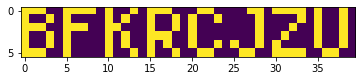

In [413]:
import matplotlib.pyplot as plt
plt.imshow(res)

# Day 14

## Preparation

In [2]:
day = 'day13'
with open(f'test{day}' , 'r') as f:
    file = f.read().splitlines()
file = pd.Series(file)
file

/Users/alixtiran-cappello/.pyenv/versions/3.7.12/envs/rotor/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


Series([], dtype: float64)

In [ ]:
with open(day , 'r') as f:
    file = f.read().splitlines()
file = pd.Series(file)
file

In [ ]:
def map_pattern(x):
    #x = x.split(": ")[1]
    x = x.split(',')
    return np.array(x, dtype=int)
          
data = file.apply(map_pattern).to_list()
#data = pd.DataFrame(data)
#data = data.astype(int)
data 

## Test

## Part 1

## Part 2